In [165]:
import torch
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [166]:
words=open("names.txt",'r').read().splitlines()
x_set,test_set=train_test_split(words, test_size=0.1, random_state=32)
train_set,dev_set=train_test_split(x_set, test_size=0.11, random_state=32)

In [167]:
Table=torch.zeros((729,27),dtype=torch.int32)

In [168]:
import itertools
characters=['.']+[chr(i) for i in range(ord("a"),ord('z')+1)]
print(characters)
combination=list(itertools.product(characters, repeat=2))
a=sorted(["".join(i) for i in combination])
a

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


['..',
 '.a',
 '.b',
 '.c',
 '.d',
 '.e',
 '.f',
 '.g',
 '.h',
 '.i',
 '.j',
 '.k',
 '.l',
 '.m',
 '.n',
 '.o',
 '.p',
 '.q',
 '.r',
 '.s',
 '.t',
 '.u',
 '.v',
 '.w',
 '.x',
 '.y',
 '.z',
 'a.',
 'aa',
 'ab',
 'ac',
 'ad',
 'ae',
 'af',
 'ag',
 'ah',
 'ai',
 'aj',
 'ak',
 'al',
 'am',
 'an',
 'ao',
 'ap',
 'aq',
 'ar',
 'as',
 'at',
 'au',
 'av',
 'aw',
 'ax',
 'ay',
 'az',
 'b.',
 'ba',
 'bb',
 'bc',
 'bd',
 'be',
 'bf',
 'bg',
 'bh',
 'bi',
 'bj',
 'bk',
 'bl',
 'bm',
 'bn',
 'bo',
 'bp',
 'bq',
 'br',
 'bs',
 'bt',
 'bu',
 'bv',
 'bw',
 'bx',
 'by',
 'bz',
 'c.',
 'ca',
 'cb',
 'cc',
 'cd',
 'ce',
 'cf',
 'cg',
 'ch',
 'ci',
 'cj',
 'ck',
 'cl',
 'cm',
 'cn',
 'co',
 'cp',
 'cq',
 'cr',
 'cs',
 'ct',
 'cu',
 'cv',
 'cw',
 'cx',
 'cy',
 'cz',
 'd.',
 'da',
 'db',
 'dc',
 'dd',
 'de',
 'df',
 'dg',
 'dh',
 'di',
 'dj',
 'dk',
 'dl',
 'dm',
 'dn',
 'do',
 'dp',
 'dq',
 'dr',
 'ds',
 'dt',
 'du',
 'dv',
 'dw',
 'dx',
 'dy',
 'dz',
 'e.',
 'ea',
 'eb',
 'ec',
 'ed',
 'ee',
 'ef',
 'eg',

In [169]:
bgtoi={bg:i for i,bg in enumerate(a)}
bgtoi
itobg={i:bg for bg,i in bgtoi.items()}
ctoi={c:i for i,c in enumerate(characters)}
itoc={i:c for c,i in ctoi.items()}
bgtoi

{'..': 0,
 '.a': 1,
 '.b': 2,
 '.c': 3,
 '.d': 4,
 '.e': 5,
 '.f': 6,
 '.g': 7,
 '.h': 8,
 '.i': 9,
 '.j': 10,
 '.k': 11,
 '.l': 12,
 '.m': 13,
 '.n': 14,
 '.o': 15,
 '.p': 16,
 '.q': 17,
 '.r': 18,
 '.s': 19,
 '.t': 20,
 '.u': 21,
 '.v': 22,
 '.w': 23,
 '.x': 24,
 '.y': 25,
 '.z': 26,
 'a.': 27,
 'aa': 28,
 'ab': 29,
 'ac': 30,
 'ad': 31,
 'ae': 32,
 'af': 33,
 'ag': 34,
 'ah': 35,
 'ai': 36,
 'aj': 37,
 'ak': 38,
 'al': 39,
 'am': 40,
 'an': 41,
 'ao': 42,
 'ap': 43,
 'aq': 44,
 'ar': 45,
 'as': 46,
 'at': 47,
 'au': 48,
 'av': 49,
 'aw': 50,
 'ax': 51,
 'ay': 52,
 'az': 53,
 'b.': 54,
 'ba': 55,
 'bb': 56,
 'bc': 57,
 'bd': 58,
 'be': 59,
 'bf': 60,
 'bg': 61,
 'bh': 62,
 'bi': 63,
 'bj': 64,
 'bk': 65,
 'bl': 66,
 'bm': 67,
 'bn': 68,
 'bo': 69,
 'bp': 70,
 'bq': 71,
 'br': 72,
 'bs': 73,
 'bt': 74,
 'bu': 75,
 'bv': 76,
 'bw': 77,
 'bx': 78,
 'by': 79,
 'bz': 80,
 'c.': 81,
 'ca': 82,
 'cb': 83,
 'cc': 84,
 'cd': 85,
 'ce': 86,
 'cf': 87,
 'cg': 88,
 'ch': 89,
 'ci': 90,
 'cj': 91

In [170]:
for w in train_set:
    chs=['.']+list(w)+['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        c=ch1+ch2
        ix=bgtoi[c]
        iy=ctoi[ch3]
        Table[ix,iy]+=1
        

(-0.5, 26.5, 728.5, -0.5)

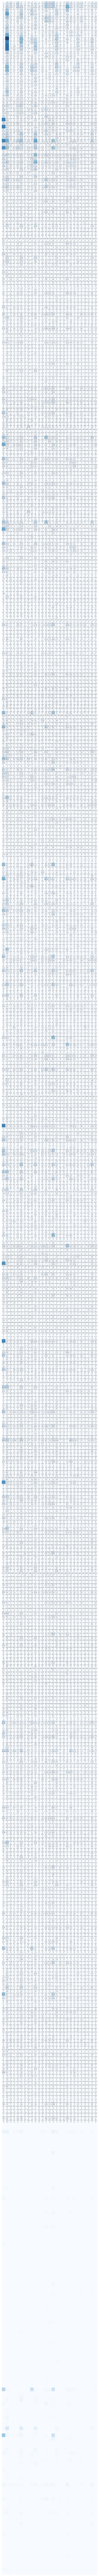

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,260))
plt.imshow(Table,cmap="Blues")
for i in range(601):
    for j in range(27):
        chstr=itobg[i]+itoc[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,Table[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off')


In [171]:
P=(Table+0.01).float()
P=P/P.sum(1,keepdims=True)
P[0].sum()

tensor(1.)

In [172]:
g=torch.Generator().manual_seed(3939)

a=input("Enter first letter?")

for i in range(60):
    inp="."+a
    ix=bgtoi[inp]
    while True:
        p=P[ix]
        w=torch.multinomial(p,1,replacement=True,generator=g).item()
        inp+=itoc[w]
        if itoc[w]=='.':
            break
        ix=bgtoi[inp[-2:]]
    print(inp)
    
    


Enter first letter?a
.ani.
.ary.
.anesbygaven.
.ah.
.armayllei.
.amaxtyce.
.aaromi.
.ah.
.allari.
.allah.
.avanyel.
.abendri.
.asana.
.abel.
.abduv.
.an.
.adisyne.
.alvie.
.akyrael.
.aadishan.
.asii.
.ann.
.aley.
.axto.
.anyelaylous.
.asimaraxteviaida.
.allinon.
.aaddeley.
.amoryiahditzi.
.ad.
.aynnienielington.
.anii.
.aydiellam.
.amirvatit.
.an.
.azeras.
.alla.
.aduimoulie.
.amarah.
.abra.
.adhermahla.
.amyramy.
.aella.
.ariola.
.an.
.anaton.
.an.
.an.
.astet.
.alavyah.
.ayetendala.
.aley.
.armen.
.ailla.
.arle.
.an.
.avion.
.alin.
.aytell.
.aret.


In [175]:
logprob=0
n=0
for w in train_set:
    chs=['.']+list(w)+['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        c=ch1+ch2
        ix=bgtoi[c]
        iy=ctoi[ch3]
        logprob+=torch.log(P[ix,iy])
        n+=1
nll=-logprob/n
print(nll)

tensor(2.0600)


In [161]:
xs=[]
ys=[]
for w in words:
    chs=['.']+list(w)+['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        c=ch1+ch2
        xs.append(bgtoi[c])
        ys.append(ctoi[ch3])
xs=torch.tensor(xs)
ys=torch.tensor(ys)
inputs=xs.shape[0]
inputs

196113

In [162]:
import torch.nn.functional as f
xenc=f.one_hot(xs,729).float()

In [163]:
W=torch.randn((729,27), generator=g, requires_grad=True)

In [164]:
for i in range(500):
    logits=xenc @ W
    counts=logits.exp()
    prob=counts/counts.sum(1,keepdims=True)
    loss=-prob[torch.arange(inputs),ys].log().mean()+0.0001*(W**2).mean()
    W.grad=None
    loss.backward()
    print(loss.item())
    W.data-=50*W.grad

3.7290456295013428
3.648996114730835
3.5743155479431152
3.504744291305542
3.4401936531066895
3.380593776702881
3.3258111476898193
3.2756216526031494
3.2297115325927734
3.187706232070923
3.14920711517334
3.1138222217559814
3.0811948776245117
3.051010847091675
3.0230016708374023
2.9969356060028076
2.972616195678711
2.94987154006958
2.928550958633423
2.9085206985473633
2.889662265777588
2.8718693256378174
2.8550469875335693
2.8391106128692627
2.823984146118164
2.8095996379852295
2.795896053314209
2.782818555831909
2.770317792892456
2.758350133895874
2.746875762939453
2.735858917236328
2.725266456604004
2.7150704860687256
2.7052435874938965
2.695762872695923
2.6866061687469482
2.677753448486328
2.669187307357788
2.660891532897949
2.6528513431549072
2.645052909851074
2.637483835220337
2.6301329135894775
2.6229891777038574
2.6160430908203125
2.609285354614258
2.602707862854004
2.5963022708892822
2.590061902999878
2.5839791297912598
2.5780484676361084
2.572262763977051
2.566617012023926
2.561

2.165165424346924
2.1649670600891113
2.164769172668457
2.164572238922119
2.1643760204315186
2.1641805171966553
2.1639862060546875
2.163792371749878
2.1635994911193848
2.163407325744629
2.1632158756256104
2.16302490234375
2.1628353595733643
2.1626460552215576
2.1624577045440674
2.1622700691223145
2.162083148956299
2.1618967056274414
2.1617112159729004
2.161526679992676
2.1613430976867676
2.1611595153808594
2.1609768867492676
2.160795211791992
2.160614013671875
2.160433530807495
2.1602535247802734
2.1600747108459473
2.1598963737487793
2.1597187519073486
2.1595420837402344
2.15936541557312
2.1591899394989014
2.159014940261841
2.1588406562805176
2.1586670875549316
2.158494234085083
2.1583220958709717
2.1581504344940186
2.1579794883728027
2.157809257507324
2.157639503479004
2.157470464706421
2.157301902770996
2.1571340560913086
2.1569671630859375
2.1568007469177246
2.156634569168091
2.1564691066741943
2.1563045978546143
2.1561410427093506
2.155977249145508
2.1558144092559814
2.1556522846221

In [160]:
g=torch.Generator().manual_seed(3939)

a=input("Enter first letter?")

for i in range(60):
    inp="."+a
    ix=bgtoi[inp]
    #print(ix)
    while True:
        xenc=f.one_hot(torch.tensor([ix]),num_classes=729).float()
        logits=xenc @ W
        counts=logits.exp()
        #print(logits.shape)
        P=counts/counts.sum(1,keepdims=True)
        w=torch.multinomial(P,1,replacement=True,generator=g).item()
        inp+=itoc[w]
        if itoc[w]=='.':
            break
        ix=bgtoi[inp[-2:]]
    print(inp)
    
    


Enter first letter?h
.hai.
.haylee.
.haizaven.
.hen.
.havellei.
.haver.
.hiba.
.hon.
.hi.
.hangtori.
.halya.
.humiyaamalyn.
.hum.
.hana.
.haif.
.hanne.
.har.
.hisyne.
.huvie.
.hanie.
.hurad.
.hancelisienn.
.hamari.
.ha.
.hayah.
.hilous.
.helyah.
.hunel.
.haida.
.halinogaaddeley.
.hanavieldra.
.hel.
.heynnienielington.
.haii.
.hyllee.
.ham.
.haidhttit.
.hi.
.heeras.
.haracku.
.harutmetoriah.
.hffarisermahlyn.
.heramy.
.her.
.harykwoo.
.hadyn.
.hom.
.ha.
.hanstet.
.hurvian.
.hyetendala.
.halynna.
.helilla.
.hale.
.ha.
.hoole.
.hohniyarlen.
.her.
.horz.
.ha.
